# **Data Visualization and Feature Engineering (Week 3)**

**Step 1: Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder # Added LabelEncoder
from sklearn.decomposition import PCA

# For better plot visuals
plt.style.use('seaborn-v0_8-deep') # Using a valid seaborn style
sns.set_palette("muted")

**Step 2: Load and Clean Raw Dataset**

2.1 Load the raw dataset

In [3]:
# Load the raw dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Display first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2.2 Basic information about the dataset

In [4]:
# Check basic information about dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


2.3 Handle missing values

Numerical columns → fill with median

Categorical columns → fill with mode

In [5]:
# Handling missing values
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify if all missing values are handled
df.isnull().sum()


/tmp/ipython-input-4071323250.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-4071323250.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


2.4 Convert TotalCharges to numeric

Sometimes TotalCharges is read as a string. We need to convert it to a float.

In [6]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# If any NaN values appear after conversion, replace with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-171922793.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


2.5 Encode categorical variables

We will:

Label encode binary categorical columns (Yes/No, Male/Female)

One-hot encode categorical columns with more than two unique values

In [7]:
# Label Encoding for binary categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])

# One-hot encoding for multi-category columns
df = pd.get_dummies(df, drop_first=True)


2.6 Scale numerical features

We will scale tenure, MonthlyCharges, and TotalCharges to bring them to a similar range.

In [8]:
scaler = StandardScaler()

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])


2.7 Verify clean data

In [9]:
# Check the cleaned dataset
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,False,False,False,False,False,False,False,False,True,False


# **Step 3: Advanced Visualizations**
3.1 Correlation Heatmap

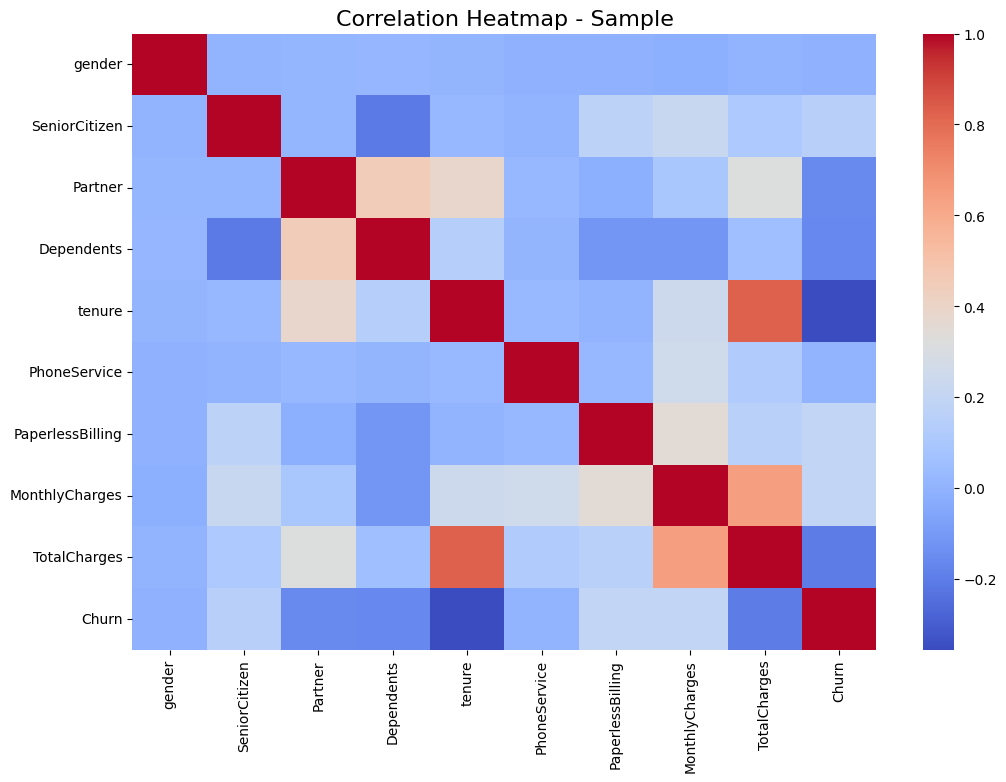

In [10]:
# Keep only numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Optional: Use only a subset of rows
numeric_df = numeric_df.sample(5000, random_state=42)

corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap - Sample", fontsize=16)
plt.show()


3.2 Distribution of numerical features

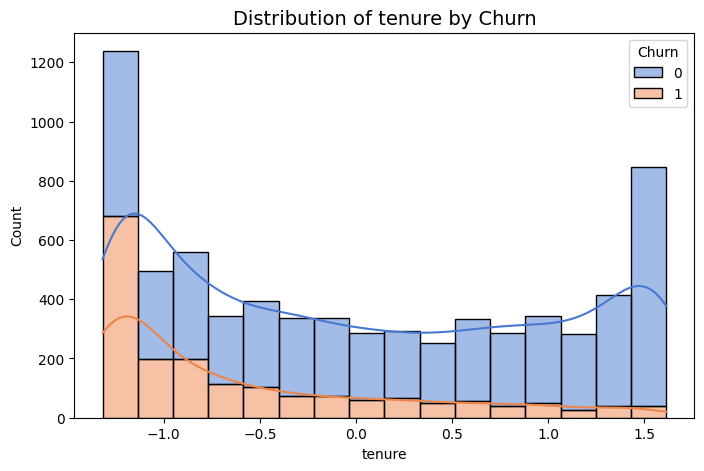

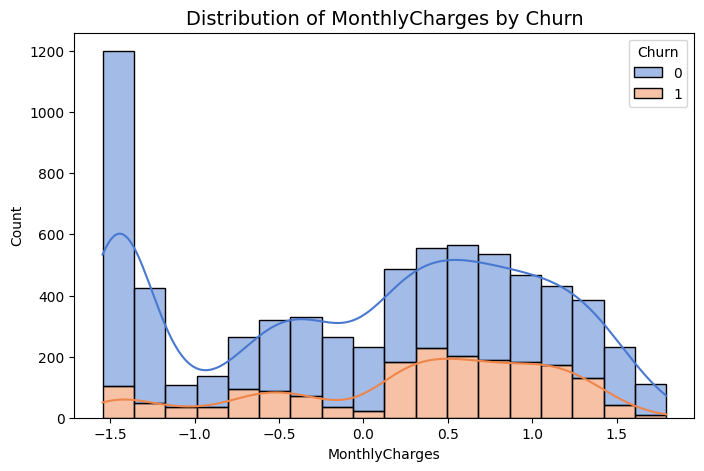

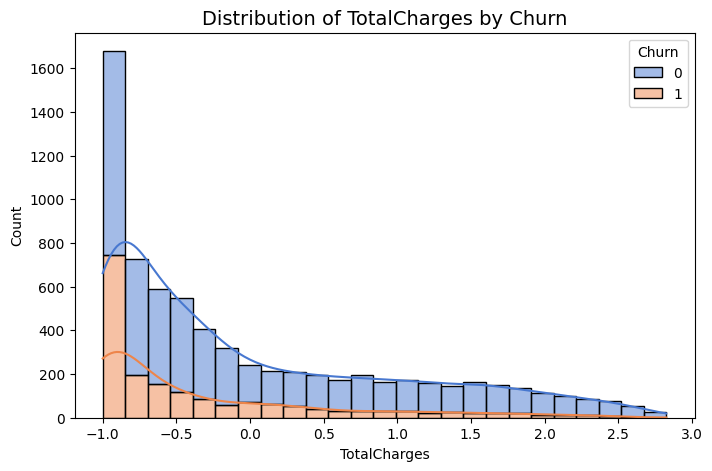

In [11]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', kde=True)
    plt.title(f"Distribution of {col} by Churn", fontsize=14)
    plt.show()


**3.3 Churn comparison by demographics**

Example with gender or contract type:

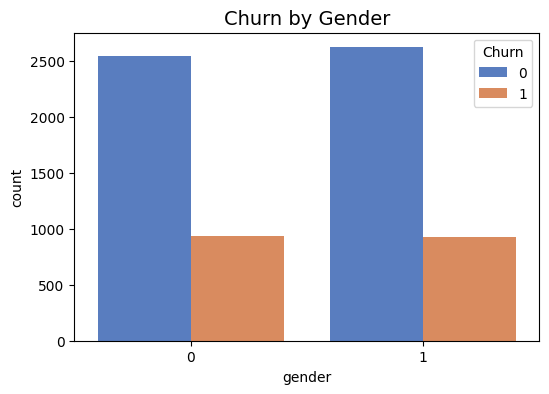

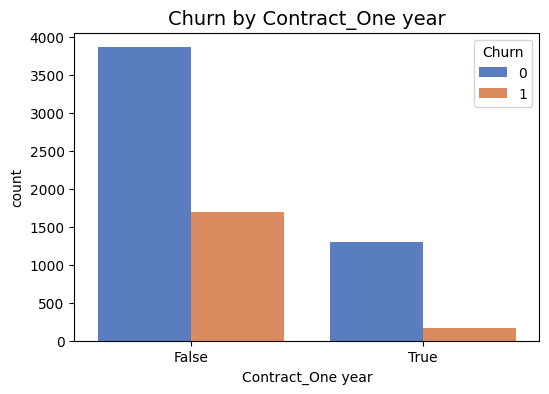

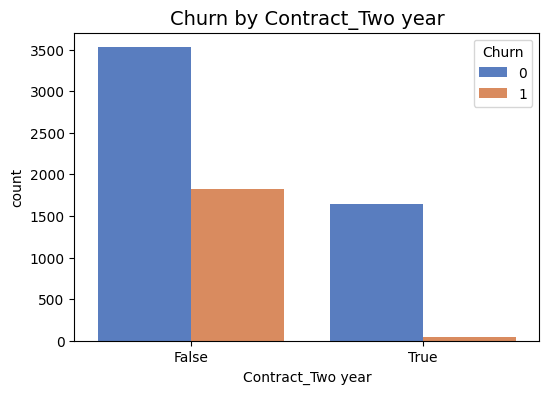

In [12]:
# Churn by gender
if 'gender' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='gender', hue='Churn')
    plt.title("Churn by Gender", fontsize=14)
    plt.show()

# Churn by Contract Type
contract_cols = [col for col in df.columns if 'Contract' in col]
if contract_cols:
    for col in contract_cols:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f"Churn by {col}", fontsize=14)
        plt.show()


# **Step 4: Feature Engineering**
4.1 Engagement Score

In [13]:
df['EngagementScore'] = df['tenure'] * df['TotalCharges']


4.2 Average Monthly Charges

In [14]:
df['AvgMonthlyCharges'] = np.where(df['tenure'] > 0,
                                   df['TotalCharges'] / df['tenure'],
                                   df['MonthlyCharges'])


4.3 Total Services Subscribed

If you have multiple service-related columns like Internet, Phone, Streaming, etc.

In [15]:
service_cols = [col for col in df.columns if 'Service' in col or 'service' in col]

if service_cols:
    df['TotalServices'] = df[service_cols].sum(axis=1)


4.4 Cost Per Service

In [16]:
if 'TotalServices' in df.columns:
    df['CostPerService'] = np.where(df['TotalServices'] > 0,
                                    df['TotalCharges'] / df['TotalServices'],
                                    df['TotalCharges'])


# **Step 5: PCA for Dimensionality Reduction**

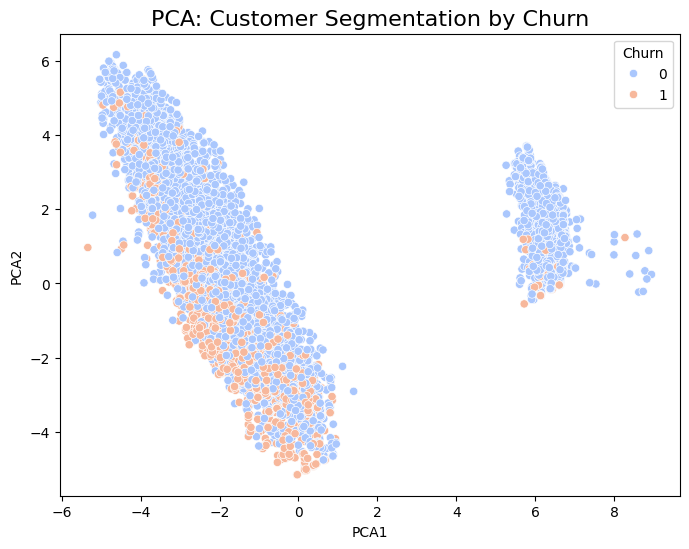

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Standardize features again for PCA
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Churn'] = y.values

# Visualize PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Churn', data=pca_df, palette='coolwarm')
plt.title("PCA: Customer Segmentation by Churn", fontsize=16)
plt.show()


Step 6: Save the Final Refined Dataset

In [18]:
df.to_csv("Refined_Customer_Churn.csv", index=False)
print("Refined dataset saved successfully as 'Refined_Customer_Churn.csv'")


Refined dataset saved successfully as 'Refined_Customer_Churn.csv'
